In [5]:
import numpy as np
import pandas as pd

In [6]:
df = pd.read_csv('Restaurant_Reviews.tsv', delimiter='\t', quoting=3)

In [7]:
df.shape

(1000, 2)

In [8]:
df.columns

Index(['Review', 'Liked'], dtype='object')

In [9]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


# **Data Preprocessing**

In [10]:
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sameer_Sayed\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
corpus = []
for i in range(0,1000):

  review = re.sub(pattern='[^a-zA-Z]',repl=' ', string=df['Review'][i])

  review = review.lower()

  review_words = review.split()

  review_words = [word for word in review_words if not word in set(stopwords.words('english'))]

  ps = PorterStemmer()
  review = [ps.stem(word) for word in review_words]

  review = ' '.join(review)

  corpus.append(review)

In [12]:
corpus[0:10]

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch']

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1500)
X = cv.fit_transform(corpus).toarray()
y = df.iloc[:, 1].values

# **Model Building**

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [15]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [16]:
y_pred = classifier.predict(X_test)

In [17]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
score1 = accuracy_score(y_test,y_pred)
score2 = precision_score(y_test,y_pred)
score3= recall_score(y_test,y_pred)
print("---- Scores ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}".format(round(score2,2)))
print("Recall score is: {}".format(round(score3,2)))

---- Scores ----
Accuracy score is: 76.5%
Precision score is: 0.76
Recall score is: 0.79


In [18]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [19]:
cm

array([[72, 25],
       [22, 81]])

Text(95.72222222222221, 0.5, 'Actual values')

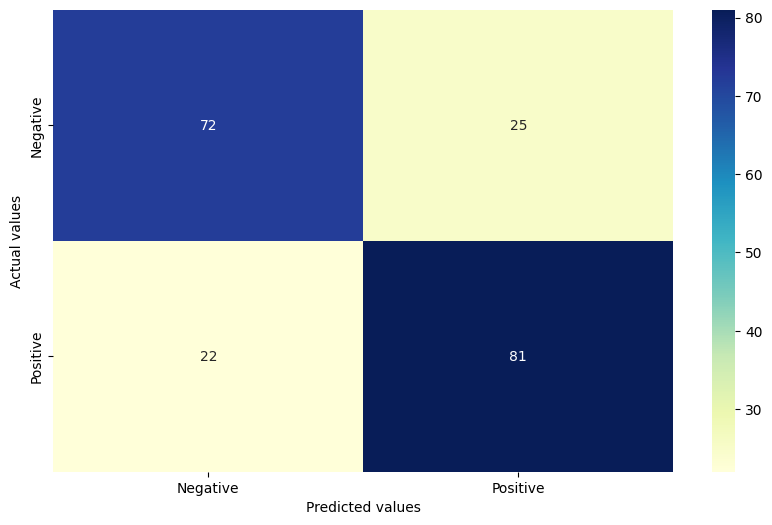

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize = (10,6))
sns.heatmap(cm, annot=True, cmap="YlGnBu", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

In [21]:
best_accuracy = 0.0
alpha_val = 0.0
for i in np.arange(0.1,1.1,0.1):
  temp_classifier = MultinomialNB(alpha=i)
  temp_classifier.fit(X_train, y_train)
  temp_y_pred = temp_classifier.predict(X_test)
  score = accuracy_score(y_test, temp_y_pred)
  print("Accuracy score for alpha={} is: {}%".format(round(i,1), round(score*100,2)))
  if score>best_accuracy:
    best_accuracy = score
    alpha_val = i
print('--------------------------------------------')
print('The best accuracy is {}% with alpha value as {}'.format(round(best_accuracy*100, 2), round(alpha_val,1)))

Accuracy score for alpha=0.1 is: 78.0%
Accuracy score for alpha=0.2 is: 78.5%
Accuracy score for alpha=0.3 is: 78.0%
Accuracy score for alpha=0.4 is: 78.5%
Accuracy score for alpha=0.5 is: 77.5%
Accuracy score for alpha=0.6 is: 77.5%
Accuracy score for alpha=0.7 is: 77.5%
Accuracy score for alpha=0.8 is: 77.0%
Accuracy score for alpha=0.9 is: 76.5%
Accuracy score for alpha=1.0 is: 76.5%
--------------------------------------------
The best accuracy is 78.5% with alpha value as 0.2


In [22]:
classifier = MultinomialNB(alpha=0.2)
classifier.fit(X_train, y_train)

,alpha,0.2
,force_alpha,True
,fit_prior,True
,class_prior,None


# **Predictions**

In [23]:
def predict_sentiment(sample_review):
  sample_review = re.sub(pattern='[^a-zA-Z]',repl=' ', string = sample_review)
  sample_review = sample_review.lower()
  sample_review_words = sample_review.split()
  sample_review_words = [word for word in sample_review_words if not word in set(stopwords.words('english'))]
  ps = PorterStemmer()
  final_review = [ps.stem(word) for word in sample_review_words]
  final_review = ' '.join(final_review)

  temp = cv.transform([final_review]).toarray()
  return classifier.predict(temp)

In [24]:
sample_review = 'The food is really good here.'

if predict_sentiment(sample_review):
  print('This is a POSITIVE review.')
else:
  print('This is a NEGATIVE review!')

This is a POSITIVE review.


In [25]:
sample_review = 'Food was pretty bad and the service was very slow.'

if predict_sentiment(sample_review):
  print('This is a POSITIVE review.')
else:
  print('This is a NEGATIVE review!')

This is a NEGATIVE review!


In [26]:
sample_review = 'The food was absolutely wonderful, from preparation to presentation, very pleasing.'

if predict_sentiment(sample_review):
  print('This is a POSITIVE review.')
else:
  print('This is a NEGATIVE review!')

This is a POSITIVE review.
